In [1]:
import os
# import json
import pandas as pd
import numpy as np
import gensim.models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

# from sklearn.naive_bayes import BernoulliNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import ExtraTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.svm import LinearSVC
# from sklearn.neighbors import NearestCentroid
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.neighbors import RadiusNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import RidgeClassifier
# from sklearn.linear_model import RidgeClassifierCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, MaxPool1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers 
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM

In [2]:
import pandas as pd 

df =  pd.read_csv(r'../essay_grader/data/essay_data.csv')
df.head(3)

,text,year,name,title,score,level,title_name
0,"The question is asking that, in the same disci...",2017,"4, 5 - Est_Chen-fzn235-TOK_essay.docx",5,4,2,"Given access to the same facts, how is it poss..."
1,"Our brains seek coherence, structure, and orde...",2017,"7, 6 - Eva GuoTOK_final_final_draft.docx",6,7,4,Humans are pattern-seeking animals and we are ...
2,In American Heritage® Dictionary of the Englis...,2017,"7, 5 - fzn260_Yessica_Ji_Yuanyi_G12-9_TOKEssay...",5,7,4,"Given access to the same facts, how is it poss..."


In [350]:
test_data = clean_string(test_data,'text',period = True, replacement = ' ')

In [348]:
import re

def clean_string(df,column,period = False, replacement = ''):
    
    df_new = df.copy()   
    new_list = []
    
    # Covert all words to lower case
    df_new[column] = df_new[column].str.lower()
    # handle digits
    df_new[column] = df_new[column].str.replace('\d+', replacement)
    # Handle contractions
    df_new[column] = df_new[column].str.replace("he's", "he is")
    df_new[column] = df_new[column].str.replace("we're", "we are")
    df_new[column] = df_new[column].str.replace("they're", "they are")
    df_new[column] = df_new[column].str.replace("i'm", "i am")
    df_new[column] = df_new[column].str.replace("she's", "she is")
    df_new[column] = df_new[column].str.replace("it's", "it is")
    # Handle English punctuations except period
    df_new[column] = df_new[column].str.replace('[-!#$%&\'()*+,/:;<=>?@[\\]^_`{|}~\t]',replacement)
    df_new[column] = df_new[column].str.replace('\\',replacement)
    # Handle period
    if period:
        df_new[column] = df_new[column].str.replace('.',replacement)
    # Handle Chinese punctuations and Chinese characters
    df_new[column] = df_new[column].str.replace(r'[^\x00-\x7F]+', replacement)
    
    #hanldle multiple line into one line for paragraph separator
    for i in df_new.index:  
        new_list.append(re.sub(r'\n+','\n', df_new[column][i]))   
    df_new[column] = pd.DataFrame(new_list)
    df_new[column][0]
        
    return df_new

# remove stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) 

def remove_stopwords(x):
    word_tokens = word_tokenize(x) 
    return ' '.join([w for w in word_tokens if not w in stop_words])

In [22]:
df = remove_all(df)

In [20]:
# remove bibliography, works cited, word cited paragraph
import pandas as pd
import re

def remove_last_para(df,word):

    list_test = []
    df['text']= df.text.str.lower()

    bool_list= df.text.str.contains(word, case = False, na = False)

    for i in bool_list.index:

        if bool_list[i] == False:
            list_test.append(df['text'][i])

        else:
            l = df['text'][i].split(word)[0:-1]
            l2 = word.join(l)
            list_test.append(l2)

    df['text'] = pd.DataFrame(list_test)

    return df

In [21]:

def remove_all(df):
    word_list = ['word cited','bibliography','works cited']
    for i in word_list:
        df = remove_last_para(df,i)       
    return df   

In [31]:
bool_list= df.text.str.contains('word cited', case = False, na = False)
bool_list[0]

False

In [32]:
test_list = []

for i in bool_list.index:
    if bool_list[i] == True:
        test_list.append(i)

In [5]:
import spacy
# one sentencse only for test 
test_list = []

nlp = spacy.load("en_core_web_sm")
doc = nlp(df)

for token in doc:
    test_list.append(token.pos_)

In [26]:
from nltk import tokenize
p = df_new['text'][0]

sentes = tokenize.sent_tokenize(p)

NameError: name 'df_new' is not defined

In [7]:
from nltk import tokenize
import spacy
import statistics

nlp = spacy.load("en_core_web_sm")

sentences = tokenize.sent_tokenize(df_new['text'][0])
sentences

NameError: name 'df_new' is not defined

In [58]:
from nltk import tokenize
import spacy
import statistics

nlp = spacy.load("en_core_web_sm")



mean_unique_all_eassy = []

for index in df_new.index:
    sentences = tokenize.sent_tokenize(df_new['text'][index])
    
    len_unique_eassy =[]  
    for i in range(len(sentences)):
        doc = nlp(sentences[i])        
        
        word_type_list =[]
        for token in doc:
            word_type_list.append(token.pos_)   
            
        len_unique_eassy.append(len(set(word_type_list)))
    
    mean_unique_all_eassy.append(statistics.mean(len_unique_eassy))

mean_unique_all_eassy

[8.96808510638298,
 8.41891891891892,
 10.071428571428571,
 8.95774647887324,
 9.157142857142857,
 9.363636363636363,
 8.321428571428571,
 9.283783783783784,
 9.642857142857142,
 9.5625,
 7.428571428571429,
 8.654761904761905,
 8.8,
 9.41095890410959,
 8.12087912087912,
 8.988372093023257,
 9.057971014492754,
 8.010204081632653,
 9.384615384615385,
 9.175,
 9.178082191780822,
 8.1,
 8.346153846153847,
 8.08433734939759,
 7.931034482758621,
 7.761467889908257,
 10.40983606557377,
 7.584269662921348,
 8.701149425287356,
 8.541284403669724,
 8.085365853658537,
 9.05952380952381,
 6.9035087719298245,
 9.582089552238806,
 7.932584269662922,
 6.818181818181818,
 7.394736842105263,
 7.951219512195122,
 9.507692307692308,
 8.782608695652174,
 9.173333333333334,
 10.246153846153845,
 8.717647058823529,
 7.915094339622642,
 8.144578313253012,
 7.267441860465116,
 7.786666666666667,
 9.944444444444445,
 8.946666666666667,
 8.346534653465346,
 8.417582417582418,
 9.158730158730158,
 8.423076923076

In [60]:
df_new['mean_part_speech'] = pd.DataFrame(mean_unique_all_eassy)

In [536]:
df_new

NameError: name 'df_new' is not defined

In [62]:
df_new.groupby('level').mean_part_speech.agg(['mean','std'])

,mean,std
level,,
1,8.838400,0.682460
2,8.899004,0.682339
3,8.859543,0.719587
4,8.742993,0.682382
5,8.684439,0.645505


In [205]:
from nltk import tokenize
import spacy
import statistics

nlp = spacy.load("en_core_web_sm")


mean_unique_all_eassy = []

for index in df_new.index:
    sentences = tokenize.sent_tokenize(df_new['text'][index])
    
    len_unique_eassy =[]  
    for i in range(len(sentences)):
        doc = nlp(sentences[i])        
        
        word_type_list =[]
        for token in doc:
            word_type_list.append(token.pos_)   
            
        len_unique_eassy.append(len(set(word_type_list)))
    
    mean_unique_all_eassy.append(len(set(len_unique_eassy)))

mean_unique_all_eassy

[12,
 9,
 7,
 13,
 9,
 9,
 8,
 11,
 10,
 10,
 11,
 9,
 11,
 10,
 14,
 10,
 10,
 14,
 8,
 10,
 10,
 11,
 12,
 9,
 7,
 8,
 10,
 10,
 10,
 12,
 10,
 9,
 11,
 7,
 15,
 10,
 12,
 8,
 9,
 13,
 12,
 10,
 10,
 9,
 14,
 9,
 13,
 8,
 10,
 11,
 9,
 10,
 14,
 14,
 10,
 14,
 14,
 9,
 8,
 13,
 9,
 13,
 10,
 8,
 10,
 10,
 8,
 11,
 8,
 11,
 11,
 10,
 8,
 8,
 12,
 12,
 9,
 10,
 13,
 13,
 12,
 12,
 9,
 10,
 9,
 9,
 14,
 8,
 9,
 13,
 10,
 8,
 10,
 9,
 9,
 12,
 12,
 12,
 9,
 8,
 8,
 7,
 9,
 9,
 9,
 11,
 10,
 10,
 10,
 8,
 14,
 10,
 10,
 8,
 10,
 14,
 10,
 9,
 11,
 9,
 9,
 10,
 14,
 10,
 10,
 12,
 10,
 10,
 9,
 10,
 9,
 10,
 12,
 11,
 14,
 9,
 9,
 11,
 13,
 10,
 11,
 12,
 15,
 10,
 11,
 14,
 9,
 9,
 11,
 10,
 10,
 10,
 12,
 9,
 9,
 11,
 7,
 9,
 12,
 8,
 8,
 14,
 9,
 11,
 12,
 9,
 11,
 10,
 12,
 11,
 13,
 9,
 8,
 15,
 10,
 10,
 10,
 10,
 11,
 10,
 9,
 10,
 10,
 9,
 10,
 12,
 10,
 9,
 9,
 7,
 11,
 8,
 10,
 9,
 9,
 12,
 10,
 11,
 9,
 11,
 9,
 9,
 11,
 11,
 11,
 11,
 9,
 10,
 15,
 10,
 12,
 8,
 11,
 11,
 10,
 

In [206]:
df_new['variety_part_speech'] = pd.DataFrame(mean_unique_all_eassy)
df_new.groupby('level').variety_part_speech.agg(['mean','std'])

,mean,std
level,,
1,10.653061,1.640008
2,10.400000,1.763144
3,10.314465,1.790051
4,10.406250,1.900031
5,9.800000,0.836660


In [291]:
from nltk import tokenize
import spacy
import statistics

nlp = spacy.load("en_core_web_sm")

vari_unique_all_eassy = []

for index in df_new.index:
    sentences = tokenize.sent_tokenize(df_new['text'][index])
    
    len_unique_eassy =[]  
    for i in range(len(sentences)):
        doc = nlp(sentences[i])        
        
        word_type_list =[]
        for token in doc:
            word_type_list.append(token.pos_)   
            
        len_unique_eassy.append(len(word_type_list))
    
    vari_unique_all_eassy.append(len(len_unique_eassy))

vari_unique_all_eassy

[96,
 55,
 38,
 71,
 66,
 65,
 62,
 72,
 54,
 73,
 83,
 70,
 56,
 74,
 92,
 80,
 65,
 100,
 63,
 71,
 73,
 64,
 101,
 59,
 41,
 89,
 58,
 58,
 74,
 102,
 65,
 81,
 72,
 66,
 88,
 51,
 98,
 56,
 64,
 72,
 75,
 63,
 85,
 79,
 86,
 51,
 75,
 54,
 73,
 85,
 93,
 59,
 83,
 138,
 90,
 95,
 79,
 56,
 56,
 71,
 66,
 89,
 67,
 65,
 75,
 77,
 67,
 83,
 64,
 61,
 91,
 89,
 58,
 65,
 77,
 57,
 57,
 73,
 88,
 71,
 59,
 76,
 71,
 71,
 59,
 72,
 89,
 70,
 82,
 102,
 72,
 52,
 65,
 74,
 56,
 94,
 70,
 60,
 70,
 70,
 71,
 78,
 73,
 53,
 84,
 54,
 84,
 63,
 69,
 42,
 95,
 73,
 70,
 61,
 82,
 83,
 69,
 81,
 87,
 63,
 32,
 74,
 99,
 68,
 93,
 72,
 66,
 70,
 68,
 56,
 68,
 53,
 55,
 60,
 85,
 62,
 59,
 67,
 98,
 64,
 74,
 91,
 100,
 72,
 64,
 77,
 56,
 73,
 71,
 79,
 53,
 71,
 93,
 60,
 101,
 58,
 76,
 46,
 85,
 53,
 61,
 63,
 61,
 67,
 73,
 64,
 98,
 82,
 68,
 79,
 77,
 63,
 75,
 87,
 71,
 82,
 66,
 88,
 70,
 56,
 72,
 70,
 90,
 75,
 79,
 73,
 64,
 61,
 64,
 64,
 66,
 65,
 93,
 76,
 75,
 93,
 79,
 71,
 55

In [292]:
df_new['vari_unique_all_eassy'] = pd.DataFrame(vari_unique_all_eassy)
df_new.groupby('level').vari_unique_all_eassy.agg(['mean','std'])

,mean,std
level,,
1,73.448980,16.359326
2,70.854545,13.003221
3,69.301887,12.551542
4,70.390625,14.013165
5,59.800000,14.855975


In [215]:
doc1 = nlp(df_new['text'][0])

word_type_list_essay = []
for token in doc1:
    word_type_list_essay.append(token.pos_)
word_type_list_essay
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(word_type_list_essay)
df_test_1= pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())
df_test2 = df_test_1.sum(axis=0)
df_test3 = pd.DataFrame(df_test2).transpose()
df_test3

,adj,adp,adv,aux,cconj,det,intj,noun,num,part,pron,propn,punct,sconj,space,verb
0,126,190,67,106,48,211,2,395,9,41,75,23,8,41,189,206


In [173]:
import statistics
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


nlp = spacy.load("en_core_web_sm")

all_essay_word_list = []
for index in df_level1.index:  
        doc1 = nlp(df_new['text'][index])
        
        one_essay_word_type = []
        for token in doc1:
            word_type_list_essay.append(token.pos_)
            vectorizer = CountVectorizer()
            X = vectorizer.fit_transform(word_type_list_essay)
            df_test_1= pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())
            df_test2 = df_test_1.sum(axis=0)
            df_test3 = pd.DataFrame(df_test2).transpose()

AttributeError: 'str' object has no attribute 'pos_'

In [260]:
# Get a estimator for all levels 
# Take the estimator out the result for each articles 
piano_text = 'Gus who is learning piano is worried'
piano_doc = nlp(piano_text)

list_tst = []

for token in piano_doc:
    list_tst.append(token.dep_)

In [261]:
token.dep_

'acomp'

In [284]:
from nltk import tokenize
import spacy
import statistics

nlp = spacy.load("en_core_web_sm")

mean_unique_all_eassy = []

for index in df_new.index :
    sentences = tokenize.sent_tokenize(df_new['text'][index])
    
    com_unique_eassy =[] 
    for i in range(len(sentences)):
        doc = nlp(sentences[i])        
        
        word_type_list =[]
        for token in doc:
            word_type_list.append(token.dep_)   
            
        com_unique_eassy.append(len(word_type_list) - word_type_list.count('ROOT'))
    
    mean_unique_all_eassy.append(statistics.mean(com_unique_eassy))

mean_unique_all_eassy

[16.90625,
 30.636363636363637,
 34.026315789473685,
 25.35211267605634,
 23.666666666666668,
 25.16923076923077,
 26.112903225806452,
 22.34722222222222,
 29.85185185185185,
 22.027397260273972,
 19.6144578313253,
 23.728571428571428,
 29.589285714285715,
 22.10810810810811,
 19.25,
 19.425,
 22.70769230769231,
 17.62,
 26.349206349206348,
 22.098591549295776,
 21.904109589041095,
 22.046875,
 17.544554455445546,
 28.915254237288135,
 31.5609756097561,
 18.752808988764045,
 30.517241379310345,
 27.120689655172413,
 22.89189189189189,
 18.61764705882353,
 20.846153846153847,
 21.530864197530864,
 23.48611111111111,
 23.863636363636363,
 19.579545454545453,
 31.352941176470587,
 18.122448979591837,
 27.607142857142858,
 22.390625,
 24.84722222222222,
 23.466666666666665,
 26.063492063492063,
 18.08235294117647,
 22.82278481012658,
 21.569767441860463,
 31.372549019607842,
 20.52,
 27.537037037037038,
 20.561643835616437,
 19.976470588235294,
 15.010752688172044,
 24.74576271186441,
 20.

In [71]:
def complex_part_speech(text):
    """
    find the mean of dependencies in a essay
    input : string
    output : float
    """

    nlp = spacy.load("en_core_web_sm")

    sentences = tokenize.sent_tokenize(text)

    com_unique_essay =[]
    for i in range(len(sentences)):
        doc = nlp(sentences[i])

        word_type_list =[]
        for token in doc:
            word_type_list.append(token.dep_)

        com_unique_essay.append(len(word_type_list) - word_type_list.count('ROOT'))

    return statistics.mean(com_unique_essay)

In [16]:
import numpy as np
import spacy 

In [28]:
def complex_part_speech(df, col='text'):
    """
    find the mean of dependencies in essay
    input : dataframe
    output : list of number
    """

    nlp = spacy.load("en_core_web_sm")

    mean_unique_all_essay = []

    for index in df.index :
        sentences = tokenize.sent_tokenize(df[col][index])

        com_unique_essay =[]
        for i in range(len(sentences)):
            doc = nlp(sentences[i])

            word_type_list =[]
            for token in doc:
                word_type_list.append(token.dep_)

            com_unique_essay.append(len(word_type_list) - word_type_list.count('ROOT'))

        mean_unique_all_essay.append(statistics.mean(com_unique_essay))

    mean_unique_all_essay

    return mean_unique_all_essay

In [31]:
test_list = []

for index in df.index:
    test_list.append(index)

In [285]:
df_new['complex_part_speech'] = pd.DataFrame(mean_unique_all_eassy)
df_new.groupby('level').complex_part_speech.agg(['mean','std'])

,mean,std
level,,
1,22.954114,4.374648
2,23.583386,4.659022
3,24.639382,3.787142
4,24.773224,4.493446
5,29.069506,6.025495


In [4]:
import os
import sys
path = os.path.abspath('..')
sys.path.append(path)

In [5]:
# get the features

from essay_grader.text_feature import gen_text_feature

In [47]:
gen_text_feature(df, col='text')

,text,year,name,title,score,level,title_name,vocab_richness,mean_word_syllable,word_count,...,avg_sentence_length,count_stopwords,flesch_reading_ease,freq_wok_words,freq_aok_words,freq_cliche_words,freq_argument_words,freq_absolute_words,complex_part_speech,vari_part_speech
0,the question is asking that in the same discip...,2017,"4, 5 - Est_Chen-fzn235-TOK_essay.docx",5,4,2,"Given access to the same facts, how is it poss...",0.209360,1.540025,1525,...,16.223404,788,60.08,25,52,0,4,3,16.602151,25
1,our brains seek coherence structure and order ...,2017,"7, 6 - Eva GuoTOK_final_final_draft.docx",6,7,4,Humans are pattern-seeking animals and we are ...,0.344933,1.731380,1575,...,27.155172,724,32.80,11,7,0,3,1,28.927273,33
2,in american heritage dictionary of the english...,2017,"7, 5 - fzn260_Yessica_Ji_Yuanyi_G12-9_TOKEssay...",5,7,4,"Given access to the same facts, how is it poss...",0.398082,1.861711,1208,...,29.463415,528,19.43,8,23,0,1,0,32.184211,22
3,the statement in the prompt argues that diffic...,2017,"8, 1 - James Li TOK_Essay_4th_draft.docx",1,8,4,It is only knowledge produced with difficulty ...,0.386667,1.779394,1594,...,26.566667,732,29.33,2,14,0,5,8,28.017544,30
4,human are patternseeking animals because patte...,2017,"7, 6 - Fzn323_Amy_Wang_Qiaohui_G12_TOK_Essay_D...",6,7,4,Humans are pattern-seeking animals and we are ...,0.254939,1.554493,1500,...,22.388060,703,52.60,2,38,0,6,3,22.727273,31
5,with the rapid change in our environment and s...,2017,"5, 3 - Jenny_Ma_TOK_essay.docx",3,5,3,Should key events in the historical developmen...,0.279128,1.564486,1537,...,21.347222,735,52.81,8,39,0,5,3,23.707692,28
6,we are all in the tremendous trend of historic...,2017,"1, 3 - fzn255-Evangeline_Shi_Lehan_G12-3_TOK_E...",3,1,1,Should key events in the historical developmen...,0.344346,1.688056,1506,...,23.904762,685,39.76,4,28,0,3,0,24.403226,28
7,as the time pass inventions or creation have b...,2017,"2, 3 - fzn229_Francis_Luo_fzn-229_TOK_essay.docx",3,2,1,Should key events in the historical developmen...,0.273990,1.530934,1524,...,20.320000,719,56.69,3,12,0,9,6,21.338028,28
8,pattern is a kind of a consistent phenomenon o...,2017,"9, 6 - Vincent_Ru_TOK_Essay.docx",6,9,5,Humans are pattern-seeking animals and we are ...,0.377505,1.800259,1488,...,27.054545,599,27.07,23,5,0,3,0,27.648148,33
9,traditions are ways of conduct that has been u...,2017,"2, 4 - fzn344_Zhao_Tang_Zhao_G12-A_TOKEssay_1....",4,2,1,"In the production of knowledge, traditions of ...",0.308524,1.547074,1485,...,20.067568,731,55.58,28,19,0,2,2,20.520548,33


In [6]:
# dataframe with features from text

test_data = gen_text_feature(df, col='text')

In [8]:
test_data.head(2)

,text,year,name,title,score,level,title_name,vocab_richness,mean_word_syllable,word_count,...,avg_sentence_length,count_stopwords,flesch_reading_ease,freq_wok_words,freq_aok_words,freq_cliche_words,freq_argument_words,freq_absolute_words,complex_part_speech,vari_part_speech
0,the question is asking that in the same discip...,2017,"4, 5 - Est_Chen-fzn235-TOK_essay.docx",5,4,2,"Given access to the same facts, how is it poss...",0.209360,1.540025,1525,...,16.223404,788,60.08,25,52,0,4,3,16.602151,25
1,our brains seek coherence structure and order ...,2017,"7, 6 - Eva GuoTOK_final_final_draft.docx",6,7,4,Humans are pattern-seeking animals and we are ...,0.344933,1.731380,1575,...,27.155172,724,32.80,11,7,0,3,1,28.927273,33


In [87]:
# dataframe with features from title

from essay_grader.title_text_similarity import gen_title_text_similarity_features

In [88]:
title_features = gen_title_text_similarity_features(df, col_text = 'text', col_titles = 'title_name')
title_features.head(2)

2020-08-26 11:49:41 WARNING: Can not find mwt: default from official model list. Ignoring it.
2020-08-26 11:49:41 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |

2020-08-26 11:49:41 INFO: Use device: cpu
2020-08-26 11:49:41 INFO: Loading: tokenize
2020-08-26 11:49:41 INFO: Loading: pos
2020-08-26 11:49:42 INFO: Loading: lemma
2020-08-26 11:49:42 INFO: Done loading processors!


,text,year,name,title,score,level,title_name,title_key_word,frequency_title_words
0,the question is asking that in the same discip...,2017,"4, 5 - Est_Chen-fzn235-TOK_essay.docx",5,4,2,given access to the same facts how is it poss...,"[(give, v), (access, n), (fact, n), (disagreem...",89
1,in american heritage dictionary of the english...,2017,"7, 5 - fzn260_Yessica_Ji_Yuanyi_G12-9_TOKEssay...",5,7,4,given access to the same facts how is it poss...,"[(give, v), (access, n), (fact, n), (disagreem...",72


In [89]:
test_data2 = pd.concat([test_data,title_features['frequency_title_words']],axis=1)
test_data2.head(1)

,text,year,name,title,score,level,title_name,vocab_richness,mean_word_syllable,word_count,...,count_stopwords,flesch_reading_ease,freq_wok_words,freq_aok_words,freq_cliche_words,freq_argument_words,freq_absolute_words,complex_part_speech,vari_part_speech,frequency_title_words
0,the question is asking that in the same discip...,2017,"4, 5 - Est_Chen-fzn235-TOK_essay.docx",5,4,2,"Given access to the same facts, how is it poss...",0.20936,1.540025,1525,...,788,60.08,25,52,0,4,3,16.602151,25,89


In [115]:
# pca features
X_test = pd.concat([test_data2.iloc[:,7:11],test_data2.iloc[:,12:17]], axis=1)
X_test.keys()

Index(['vocab_richness', 'mean_word_syllable', 'word_count', 'sentence_count',
       'count_stopwords', 'flesch_reading_ease', 'freq_wok_words',
       'freq_aok_words', 'freq_cliche_words'],
      dtype='object')

In [124]:
# all features
X_test = test_data2.iloc[:,7:]
X_test.keys()

Index(['vocab_richness', 'mean_word_syllable', 'word_count', 'sentence_count',
       'avg_sentence_length', 'count_stopwords', 'flesch_reading_ease',
       'freq_wok_words', 'freq_aok_words', 'freq_cliche_words',
       'freq_argument_words', 'freq_absolute_words', 'complex_part_speech',
       'vari_part_speech', 'frequency_title_words'],
      dtype='object')

In [113]:
test_data2.iloc[:,7:].keys()

Index(['vocab_richness', 'mean_word_syllable', 'word_count', 'sentence_count',
       'avg_sentence_length', 'count_stopwords', 'flesch_reading_ease',
       'freq_wok_words', 'freq_aok_words', 'freq_cliche_words',
       'freq_argument_words', 'freq_absolute_words', 'complex_part_speech',
       'vari_part_speech', 'frequency_title_words'],
      dtype='object')

In [97]:
# nomalized the data

from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

normalizer.fit(test_data2.iloc[:,7:])

test_data2.iloc[:,7:] = normalizer.transform(test_data2.iloc[:,7:])

/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [98]:
test_data2.head(2)

,text,year,name,title,score,level,title_name,vocab_richness,mean_word_syllable,word_count,...,count_stopwords,flesch_reading_ease,freq_wok_words,freq_aok_words,freq_cliche_words,freq_argument_words,freq_absolute_words,complex_part_speech,vari_part_speech,frequency_title_words
0,the question is asking that in the same discip...,2017,"4, 5 - Est_Chen-fzn235-TOK_essay.docx",5,4,2,"Given access to the same facts, how is it poss...",0.000000,0.221303,0.698113,...,0.792035,0.826360,0.403226,0.632911,0.0,0.210526,0.230769,0.090288,0.217391,0.334586
1,our brains seek coherence structure and order ...,2017,"7, 6 - Eva GuoTOK_final_final_draft.docx",6,7,4,Humans are pattern-seeking animals and we are ...,0.672765,0.547228,0.757075,...,0.650442,0.387351,0.177419,0.063291,0.0,0.157895,0.076923,0.479306,0.565217,0.270677


In [114]:

# X = test_data['complex_part_speech'] 
y = test_data2['score']

In [577]:
dummy_y = pd.get_dummies(y)

In [125]:
from sklearn.model_selection import train_test_split
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_test,y, test_size=0.3,random_state = 4)

In [579]:
def build_cnn_model():
    model = Sequential()
    
    model.add(layers.Dense(64, input_shape = (347,4), activation='relu'))
    model.add(layers.Dense(64, activation='tanh'))
    model.add(layers.Dense(9, activation='softmax'))
    
        
    opt = RMSprop(lr=0.005)
    
    model.compile(loss="categorical_crossentropy",
                 optimizer=opt,
                 metrics=['acc'])

    return model

In [580]:
model = build_cnn_model()
model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 347, 64)           320       
_________________________________________________________________
dense_115 (Dense)            (None, 347, 64)           4160      
_________________________________________________________________
dense_116 (Dense)            (None, 347, 9)            585       
Total params: 5,065
Trainable params: 5,065
Non-trainable params: 0
_________________________________________________________________


In [581]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=3, 
                    epochs=10000,
                    callbacks=[es])

Epoch 1/10000
93/93 [==============================] - 0s 3ms/step - loss: 2.0027 - acc: 0.1986 - val_loss: 1.9418 - val_acc: 0.1714
Epoch 2/10000
93/93 [==============================] - 0s 1ms/step - loss: 1.9576 - acc: 0.1949 - val_loss: 1.9102 - val_acc: 0.3000
Epoch 3/10000
93/93 [==============================] - 0s 1ms/step - loss: 1.9360 - acc: 0.2202 - val_loss: 1.9281 - val_acc: 0.3286
Epoch 4/10000
93/93 [==============================] - 0s 1ms/step - loss: 1.9266 - acc: 0.2274 - val_loss: 1.9012 - val_acc: 0.2714
Epoch 5/10000
93/93 [==============================] - 0s 1ms/step - loss: 1.9202 - acc: 0.2166 - val_loss: 1.8816 - val_acc: 0.3143
Epoch 6/10000
93/93 [==============================] - 0s 926us/step - loss: 1.9081 - acc: 0.2491 - val_loss: 1.8853 - val_acc: 0.2714
Epoch 7/10000
93/93 [==============================] - 0s 921us/step - loss: 1.8961 - acc: 0.2022 - val_loss: 1.8790 - val_acc: 0.2714
Epoch 8/10000
93/93 [==============================] - 0s 948us/s

In [583]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = (model.predict(X_test)).round(0)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [532]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(max_depth=10, random_state=2)

cv_results = cross_validate(clf, 
                            X_train,
                            y_train,
                            scoring = "accuracy",
                            cv=10)

cv_results['test_score'].mean()

/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

0.08336134453781513

In [584]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = (model.predict(X_test)).round(0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         1

   micro avg       0.00      0.00      0.00       150
   macro avg       0.00      0.00      0.00       150
weighted avg       0.00      0.00      0.00       150
 samples avg       0.00      0.00      0.00       150



/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [600]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Instanciate model
model = KNeighborsClassifier()

# Hyperparameter space
param_distribution = {'n_neighbors': randint(1,100)}

# Instanciate Grid Search
random_search = RandomizedSearchCV(model, param_distribution, n_iter = 200)

# Fit data to Grid Search
random_search.fit(X_train,y_train)

/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1acb7e590>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [601]:
random_search.best_score_

0.25936599423631124

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import fasttext


# changed to FastText required format
train_df = df.iloc[:-50]
train_df['label_level'] = '__label__' + train_df['level'].astype(str)
train_df[['text','label_level']].to_csv('train.csv', index=None, header=None, sep='\t')


model = fasttext.train_supervised('train.csv', lr=1, wordNgrams=3, 
                                  verbose=2, minCount=1, epoch=25, loss="hs",dim=100)

In [364]:
len(sentences)

497

In [375]:
# tokenized the sentences
sentences = []

for i in test_data.index: 

    sentences.append(test_data['text'][i])

In [366]:
length_essay = []

for index in range(len(sentences)):
    length_essay.append(len(sentences[index]))
    

In [368]:
max(length_essay)

1755

In [535]:
# vectorized the tokens
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
vocab_size = 100000
word_tokenizer = Tokenizer(num_words=vocab_size)

word_tokenizer.fit_on_texts(sentences)

encode_sequences = word_tokenizer.texts_to_sequences(sentences)

In [396]:
test_li2 = []
for elt in encode_sequences:  
    test_li2.append(max(elt))
max(test_li2)

19213

In [397]:
vocab_size = max([max(elt) for elt in encode_sequences]) + 1
print('vocabulary size', vocab_size)

vocabulary size 19214


In [398]:
maxlen = max([len(elt) for elt in encode_sequences])
print('Max length:', maxlen)

Max length: 1755


In [399]:
import numpy as np

input_encoder = np.zeros((len(encode_sequences), maxlen), dtype=np.float32)


for i, sent in enumerate(encode_sequences):
    for j, word_index in enumerate(sent):
        input_encoder[i, j] = word_index

In [406]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(input_dim=19214, output_dim=64))
decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(embedded_decoder_inputs, initial_state=encoder_states)
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(5, activation='softmax'))

opt = RMSprop(lr=0.005)

model.compile(loss="categorical_crossentropy",
             optimizer=opt,
             metrics=['acc'])

model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1229696   
_________________________________________________________________
dense_85 (Dense)             (None, None, 64)          4160      
_________________________________________________________________
dense_86 (Dense)             (None, None, 5)           325       
Total params: 1,234,181
Trainable params: 1,234,181
Non-trainable params: 0
_________________________________________________________________


In [412]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=3, 
                    epochs=10000,
                    callbacks=[es])

Epoch 1/10000


ValueError: in user code:

    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 5) and (None, 1755, 5) are incompatible


In [126]:
X_train.keys()

Index(['vocab_richness', 'mean_word_syllable', 'word_count', 'sentence_count',
       'avg_sentence_length', 'count_stopwords', 'flesch_reading_ease',
       'freq_wok_words', 'freq_aok_words', 'freq_cliche_words',
       'freq_argument_words', 'freq_absolute_words', 'complex_part_speech',
       'vari_part_speech', 'frequency_title_words'],
      dtype='object')

In [129]:
numeric_features = ['vocab_richness', 'mean_word_syllable', 'word_count', 'sentence_count',
       'avg_sentence_length', 'count_stopwords', 'flesch_reading_ease',
       'freq_wok_words', 'freq_aok_words', 'freq_cliche_words',
       'freq_argument_words', 'freq_absolute_words', 'complex_part_speech',
       'vari_part_speech', 'frequency_title_words']

In [130]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer


# define model
# model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)
# max_depth=10, n_estimators=300
# max_depth=4, n_estimators=150
model = RandomForestClassifier(max_depth=6, n_estimators=500)

# define transform
numeric_transformer = Pipeline(steps=[
                ('scaler', MinMaxScaler())])

text_transformer = Pipeline(steps=[
            ('tfidf', TfidfVectorizer(
                     ngram_range=(1,3), max_features=300
            )),
#             ('w2v', Vectorizer(
#             )),    
        ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
#         ('text', text_transformer, text_features),
    ], remainder='drop')

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

In [131]:
# all features
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.24666666666666667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        13
           3       0.46      0.19      0.27        32
           4       0.29      0.54      0.38        41
           5       0.17      0.39      0.23        23
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         1

   micro avg       0.25      0.25      0.25       150
   macro avg       0.10      0.12      0.10       150
weighted avg       0.20      0.25      0.20       150



/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [121]:
# selected features by PCA

clf.fit(X_train, y_train)
preds = clf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 0.29333333333333333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        13
           3       0.64      0.22      0.33        32
           4       0.33      0.51      0.40        41
           5       0.21      0.52      0.30        23
           6       0.22      0.27      0.24        15
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         1

   micro avg       0.29      0.29      0.29       150
   macro avg       0.16      0.17      0.14       150
weighted avg       0.28      0.29      0.25       150



/Users/megan/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
def eval_score(y_test, preds):
    total = len(y_test)
    hits = 0 
    for i,v in enumerate(preds):
        if y_test.iloc[i]-v <2 and y_test.iloc[i]-v >-2:
            hits +=1
    return hits/total

In [122]:
eval_score(y_test, preds)

0.6266666666666667

In [429]:
test_data.keys()

Index(['text', 'year', 'name', 'title', 'score', 'level', 'title_name',
       'vocab_richness', 'mean_word_syllable', 'word_count', 'sentence_count',
       'avg_sentence_length', 'count_stopwords', 'flesch_reading_ease',
       'freq_wok_words', 'freq_aok_words', 'freq_cliche_words',
       'freq_argument_words', 'freq_absolute_words', 'complex_part_speech',
       'vari_part_speech'],
      dtype='object')

In [99]:
# features from the body of the essay only
test_df = test_data2.iloc[:,7:]

<AxesSubplot:>

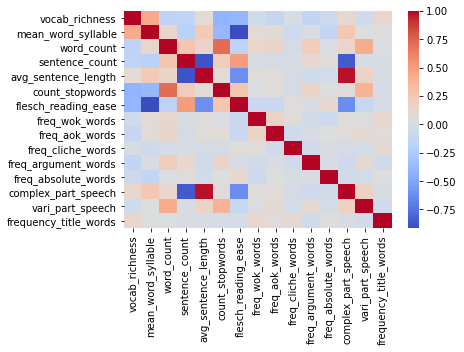

In [100]:
import seaborn as sns
sns.heatmap(test_df.corr(), cmap='coolwarm')

In [101]:
from sklearn.decomposition import PCA
pca = PCA()

# find all Principal Components PC (no y!)
pca.fit(test_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [102]:
# Print the PCs (as rows)
# Expressed as linear combination of initial vector basis (13 columns)
Wt = pd.DataFrame(pca.components_)
Wt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.354065,0.397704,-0.016363,-0.403256,0.375224,-0.169193,-0.489225,3.712116e-02,4.232215e-02,-0.011093,-0.076359,-0.096909,0.348796,0.026426,0.062891
1,0.495049,0.115573,-0.337163,0.162377,-0.309458,-0.412406,0.048939,-8.385710e-02,-3.415180e-01,0.024401,-0.184863,-0.049179,-0.272218,-0.269913,0.159612
2,-0.110140,-0.139946,-0.176000,-0.220875,0.127288,-0.050855,0.053739,-2.039694e-01,-5.031755e-01,-0.030270,-0.022189,-0.090672,0.110729,-0.053583,-0.739794
3,-0.172703,-0.410954,-0.273080,-0.377379,0.232723,-0.029967,0.222210,-1.655205e-02,-1.100059e-01,0.074248,-0.348514,0.293063,0.198970,-0.168134,0.432173
4,-0.082604,0.018368,-0.273265,-0.054204,-0.081766,-0.290851,0.022670,5.569630e-02,7.119847e-01,-0.042218,-0.299100,0.123929,-0.070923,-0.198979,-0.402722
5,0.157948,0.114311,0.073803,0.056186,-0.004567,-0.017442,-0.089263,-2.149743e-01,-5.283865e-02,-0.039194,0.239132,0.907870,-0.001083,0.033058,-0.109730
6,0.231924,0.009666,0.289474,0.179884,-0.018518,0.276184,0.000752,8.452246e-02,-9.634246e-02,0.019939,-0.781909,0.121115,0.000929,0.295425,-0.152290
7,-0.479786,0.299853,0.027701,0.090528,-0.044730,-0.141306,-0.219243,6.366516e-01,-3.021054e-01,0.066203,-0.103592,0.182882,-0.057343,-0.228403,-0.016929
8,0.483695,-0.321331,-0.047055,-0.092783,0.058310,0.018457,0.230216,6.847251e-01,3.174354e-02,0.094709,0.260679,0.063819,0.060062,0.100626,-0.175034
9,-0.189285,0.062439,-0.336221,-0.084783,-0.118096,-0.325611,0.004013,3.703880e-02,-4.518795e-02,0.037909,0.008188,0.034150,-0.079513,0.838631,0.065923


In [108]:
abs(Wt[0]).sort_values(ascending=False)

1     0.495049
8     0.483695
7     0.479786
0     0.354065
6     0.231924
9     0.189285
3     0.172703
5     0.157948
2     0.110140
4     0.082604
11    0.042025
13    0.012880
10    0.008507
12    0.007708
14    0.000008
Name: 0, dtype: float64

In [150]:
dat = pd.DataFrame(Wt[0])

In [155]:
test_data2.keys()

Index(['text', 'year', 'name', 'title', 'score', 'level', 'title_name',
       'vocab_richness', 'mean_word_syllable', 'word_count', 'sentence_count',
       'avg_sentence_length', 'count_stopwords', 'flesch_reading_ease',
       'freq_wok_words', 'freq_aok_words', 'freq_cliche_words',
       'freq_argument_words', 'freq_absolute_words', 'complex_part_speech',
       'vari_part_speech', 'frequency_title_words'],
      dtype='object')

In [144]:
pd.DataFrame(Wt[0],test_data2.keys())

,0
text,NaN
year,NaN
name,NaN
title,NaN
score,NaN
level,NaN
title_name,NaN
vocab_richness,NaN
mean_word_syllable,NaN
word_count,NaN


In [109]:
Xp = pca.transform(test_df) # Dataset expressed/projected in the new PC basis.  (eq. X.dot(Wt.T))
Rated_features = pd.DataFrame(Xp)

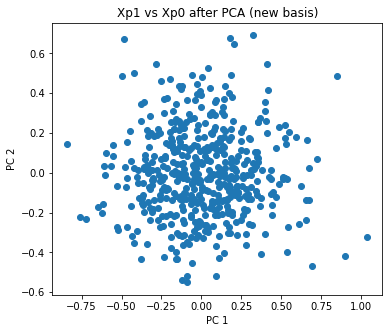

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))
# plt.subplot(1,2,1)
# plt.title('X1 vs. X0 before PCA (initial basis)'); plt.xlabel('X0'); plt.ylabel('X1')
# plt.scatter(test_df[:,0], test_df[:,1])
plt.subplot(1,2,2)
plt.title('Xp1 vs Xp0 after PCA (new basis)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(Xp[:,0], Xp[:,1])

In [106]:
(pca.explained_variance_ratio_).round(5)

array([0.23197, 0.14339, 0.11712, 0.10231, 0.0889 , 0.0817 , 0.06614,
       0.05433, 0.04483, 0.03089, 0.02723, 0.00728, 0.00303, 0.00089,
       0.     ])

In [540]:
test_data.head(2)

,text,year,name,title,score,level,title_name,vocab_richness,mean_word_syllable,word_count,...,avg_sentence_length,count_stopwords,flesch_reading_ease,freq_wok_words,freq_aok_words,freq_cliche_words,freq_argument_words,freq_absolute_words,complex_part_speech,vari_part_speech
0,the question is asking that in the same discip...,2017,"4, 5 - Est_Chen-fzn235-TOK_essay.docx",5,4,2,"Given access to the same facts, how is it poss...",0.000000,0.221303,0.698113,...,0.095829,0.792035,0.826360,0.403226,0.632911,0.0,0.235294,0.230769,0.090288,0.217391
1,our brains seek coherence structure and order ...,2017,"7, 6 - Eva GuoTOK_final_final_draft.docx",6,7,4,Humans are pattern-seeking animals and we are ...,0.672765,0.547228,0.757075,...,0.486870,0.650442,0.387351,0.177419,0.063291,0.0,0.176471,0.076923,0.479306,0.565217


In [566]:
y = test_data.score

In [595]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (2,2)),
    'nb__alpha': (0.1,1),}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

grid_search.fit(test_data.text,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...True,
        vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'tfidf__ngram_range': ((1, 1), (2, 2)), 'nb__alpha': (0.1, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [596]:
grid_search.best_score_

0.2595573440643863

In [ ]:
# combine features from title 

In [ ]:
# A